In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv(r'dataset.csv')

df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [17]:
df.count()

Unnamed: 0          114000
track_id            114000
artists             113999
album_name          113999
track_name          113999
popularity          114000
duration_ms         114000
explicit            114000
danceability        114000
energy              114000
key                 114000
loudness            114000
mode                114000
speechiness         114000
acousticness        114000
instrumentalness    114000
liveness            114000
valence             114000
tempo               114000
time_signature      114000
track_genre         114000
duration            114000
dtype: int64

In [18]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration            0
dtype: int64

In [19]:
df.dropna(axis=1, inplace=True)
df.isnull().sum()


Unnamed: 0          0
track_id            0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration            0
dtype: int64

In [22]:
df["duration"]=df["duration_ms"].apply(lambda x: round(x/1000))
df.info()
df.drop('duration_ms', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   popularity        114000 non-null  int64  
 3   duration_ms       114000 non-null  int64  
 4   explicit          114000 non-null  bool   
 5   danceability      114000 non-null  float64
 6   energy            114000 non-null  float64
 7   key               114000 non-null  int64  
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  speechiness       114000 non-null  float64
 11  acousticness      114000 non-null  float64
 12  instrumentalness  114000 non-null  float64
 13  liveness          114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

KeyError: "['duration_ms'] not found in axis"

In [23]:
# Descriptive statistics of numeric columns in df_tracks DataFrame, transposed for easy readability.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [24]:
df.set_index("release_date")
df.index=pd.to_datetime(df_tracks.index)
df.head(5)

KeyError: "None of ['release_date'] are in the columns"

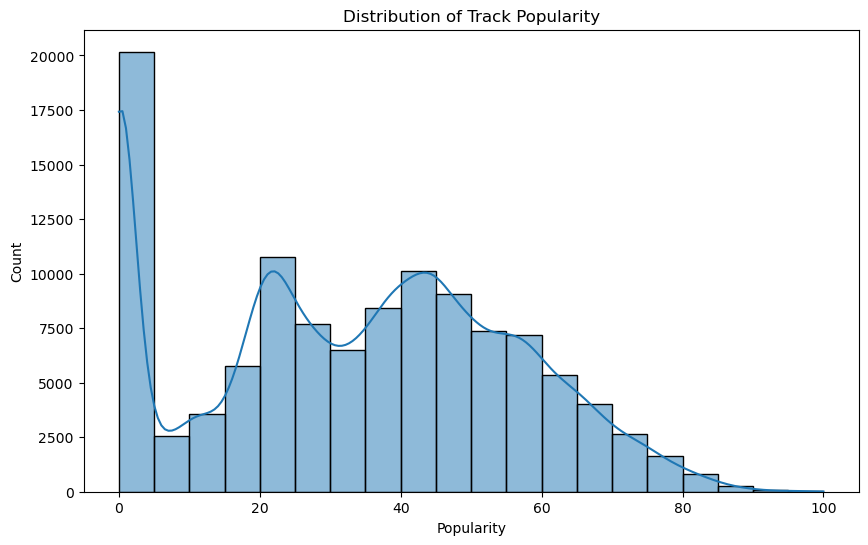

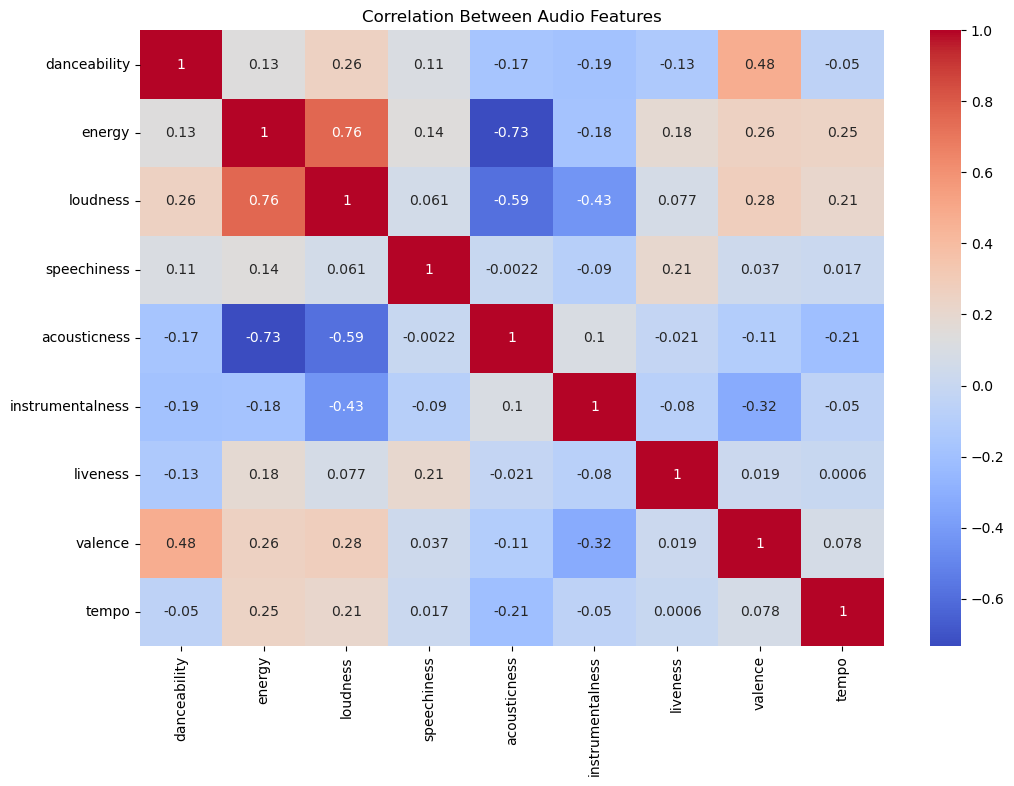

In [26]:
# Distribution of track popularity
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# Correlation heatmap for audio features
plt.figure(figsize=(12,8))
sns.heatmap(df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features')
plt.show()

In [27]:
# Count the number of tracks per artist
artist_counts = df['artists'].value_counts().head(10)

# Plot the top 10 artists by number of tracks
plt.figure(figsize=(10,6))
sns.barplot(x=artist_counts.values, y=artist_counts.index)
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artists')
plt.show()

KeyError: 'artists'

In [30]:
df = pd.read_csv('dataset 2.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [32]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [33]:
df.dropna(subset=["artists", "album_name","track_name" ], inplace=True)
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

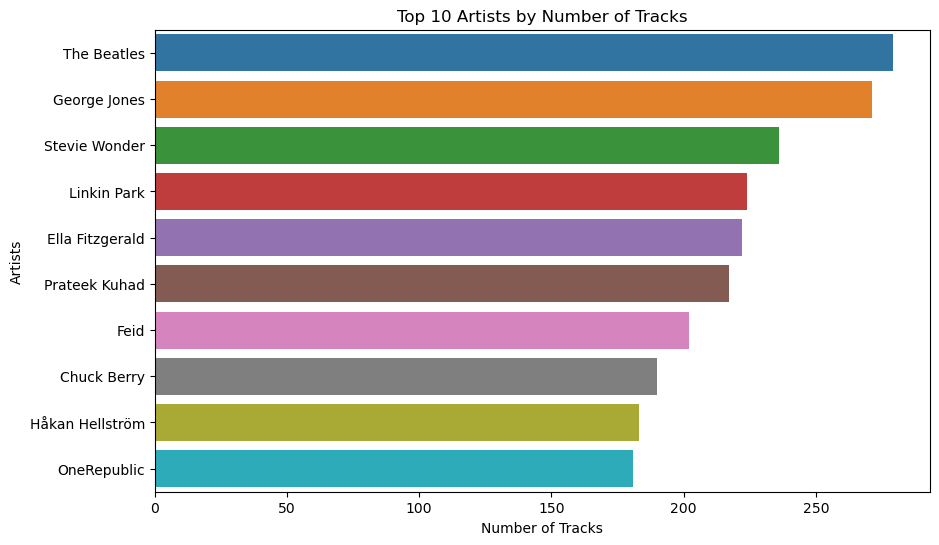

In [34]:
# Count the number of tracks per artist
artist_counts = df['artists'].value_counts().head(10)

# Plot the top 10 artists by number of tracks
plt.figure(figsize=(10,6))
sns.barplot(x=artist_counts.values, y=artist_counts.index)
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artists')
plt.show()

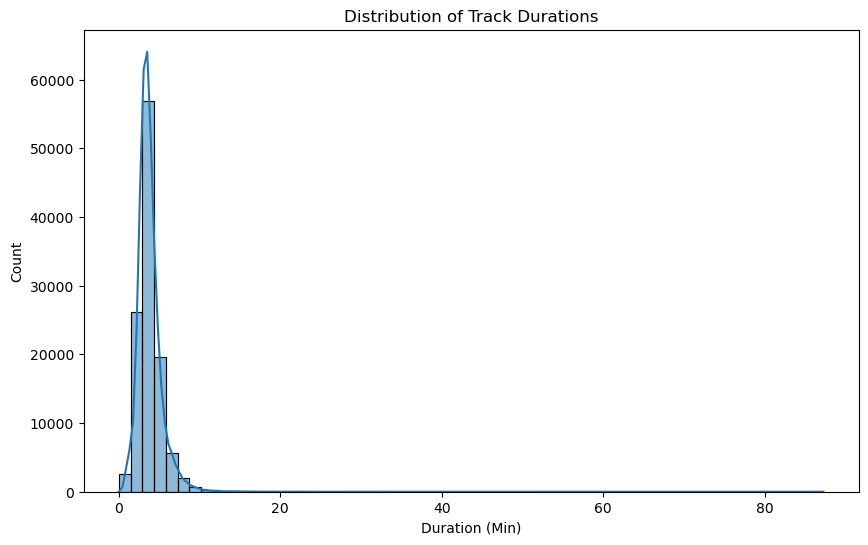

In [39]:
# Convert milliseconds to minutes for better readability
df_tracks['duration'] = df_tracks['duration_ms'] / 60000

# Plot distribution of track durations
plt.figure(figsize=(10,6))
sns.histplot(df_tracks['duration'], bins=60, kde=True)
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (Min)')
plt.ylabel('Count')
plt.show()


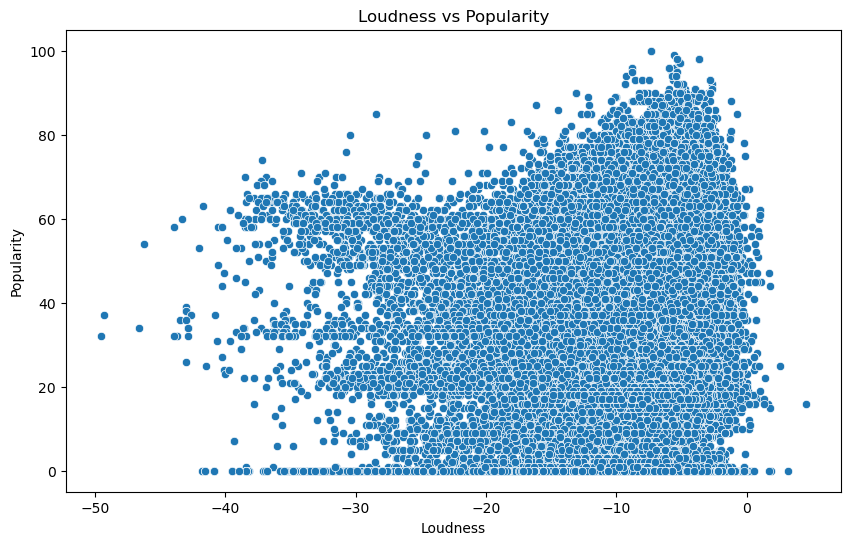

In [40]:
#loudness vs popularity
plt.figure(figsize=(10,6))
sns.scatterplot(x='loudness', y='popularity', data=df)
plt.title('Loudness vs Popularity')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.show()


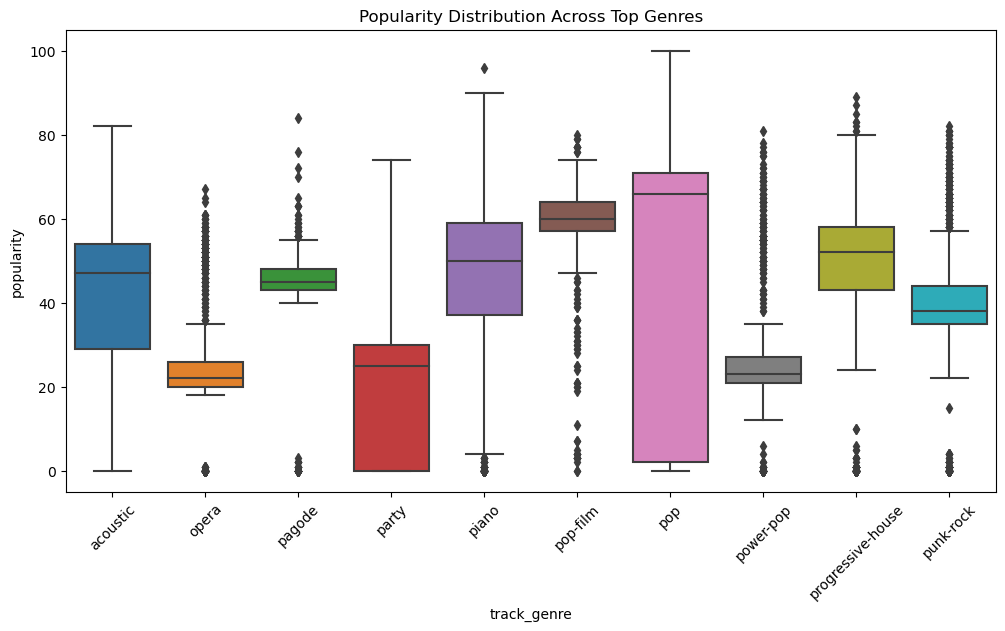

In [41]:
#Boxplot of Popularity by Track Genre
plt.figure(figsize=(12,6))
top_genres = df_tracks['track_genre'].value_counts().head(10).index
sns.boxplot(x='track_genre', y='popularity', data=df_tracks[df_tracks['track_genre'].isin(top_genres)])
plt.xticks(rotation=45)
plt.title('Popularity Distribution Across Top Genres')
plt.show()


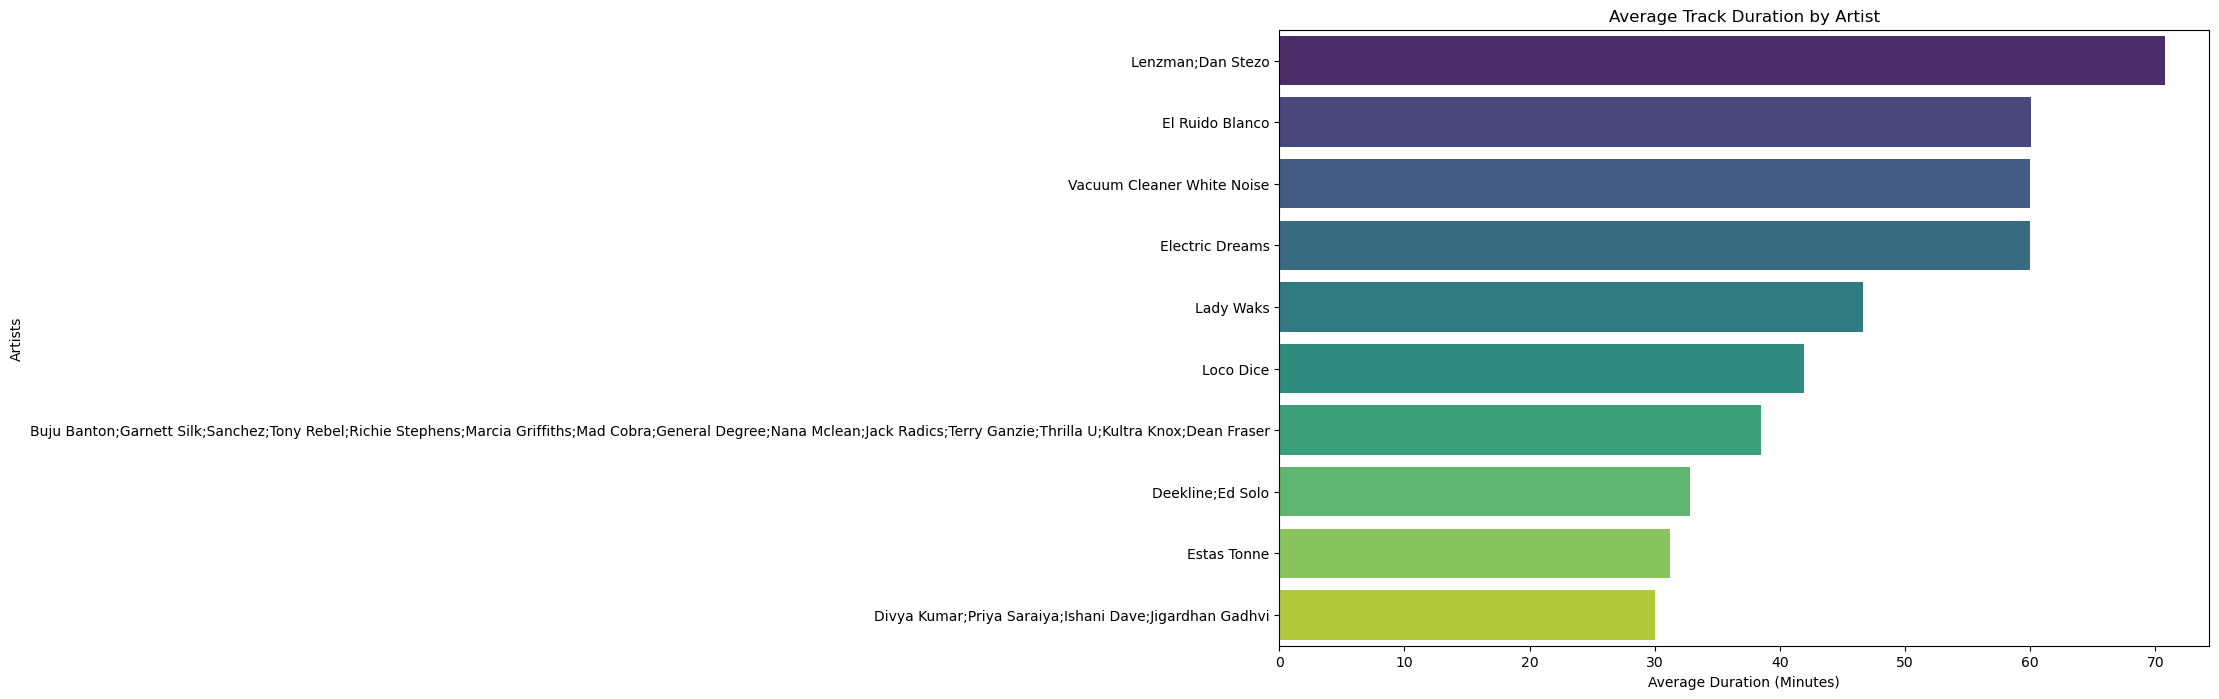

In [42]:

# Calculating average duration by artist
avg_duration_by_artist = df.groupby('artists')['duration_ms'].mean().reset_index()

# Converted duration from milliseconds to minutes for better readability
avg_duration_by_artist['duration_min'] = avg_duration_by_artist['duration_ms'] / 60000

# Sorted by average duration
avg_duration_by_artist.sort_values(by='duration_min', ascending=False, inplace=True)

# Plotted the average duration by artist
plt.figure(figsize=(12, 8))
sns.barplot(x='duration_min', y='artists', data=avg_duration_by_artist.head(10), palette='viridis')
plt.title('Average Track Duration by Artist')
plt.xlabel('Average Duration (Minutes)')
plt.ylabel('Artists')
plt.show()


In [47]:
#least popular tracks
most_popular = df[['track_name','artists','popularity']].sort_values('popularity', ascending = True )
most_popular[:10]

,track_name,artists,popularity
56999,Det kommer aldrig va över för mig,Håkan Hellström,0
68346,Bichotes Con Clase,Brray,0
68347,No Sigue Modas Aka Ella No Sigue Modas,Don Omar;Juan Magán,0
19647,Just You and Me,Tracy Lawrence,0
68361,Bipolar,Chris Jedi;Ozuna;Brytiago,0
19645,Born Again,Big & Rich;Bon Jovi,0
19644,Go Amanda,Steve Earle,0
19643,Excitable Boy,Tracy Lawrence,0
19642,Jerusalem,Steve Earle,0
19641,Winter Wonderland,Sugarland,0


[Text(0.5, 1.0, 'Popularity vs Acousticness')]

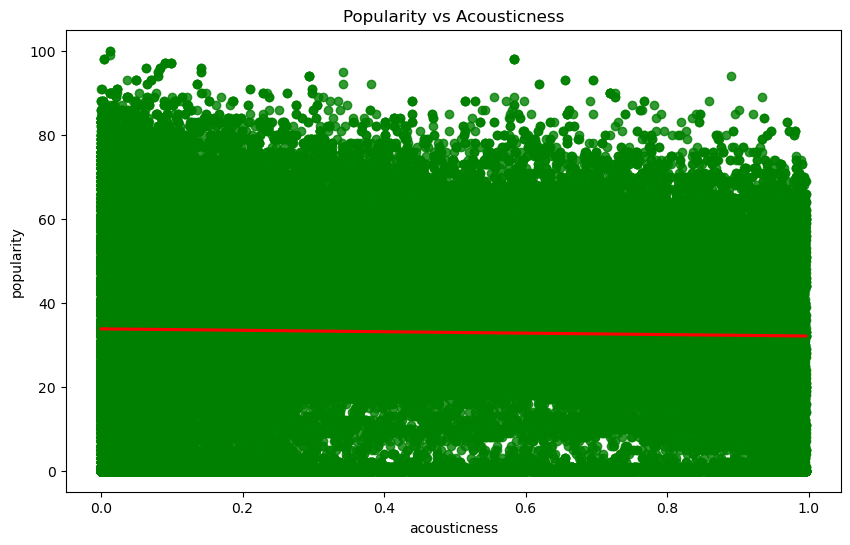

In [50]:
#
plt.figure(figsize=(10,6))
sns.regplot(data = df,
            y= "popularity",
            x = "acousticness",
            color = "g",
            line_kws={"color":"red"}).set(title="Popularity vs Acousticness")

Text(0, 0.5, 'Genres')

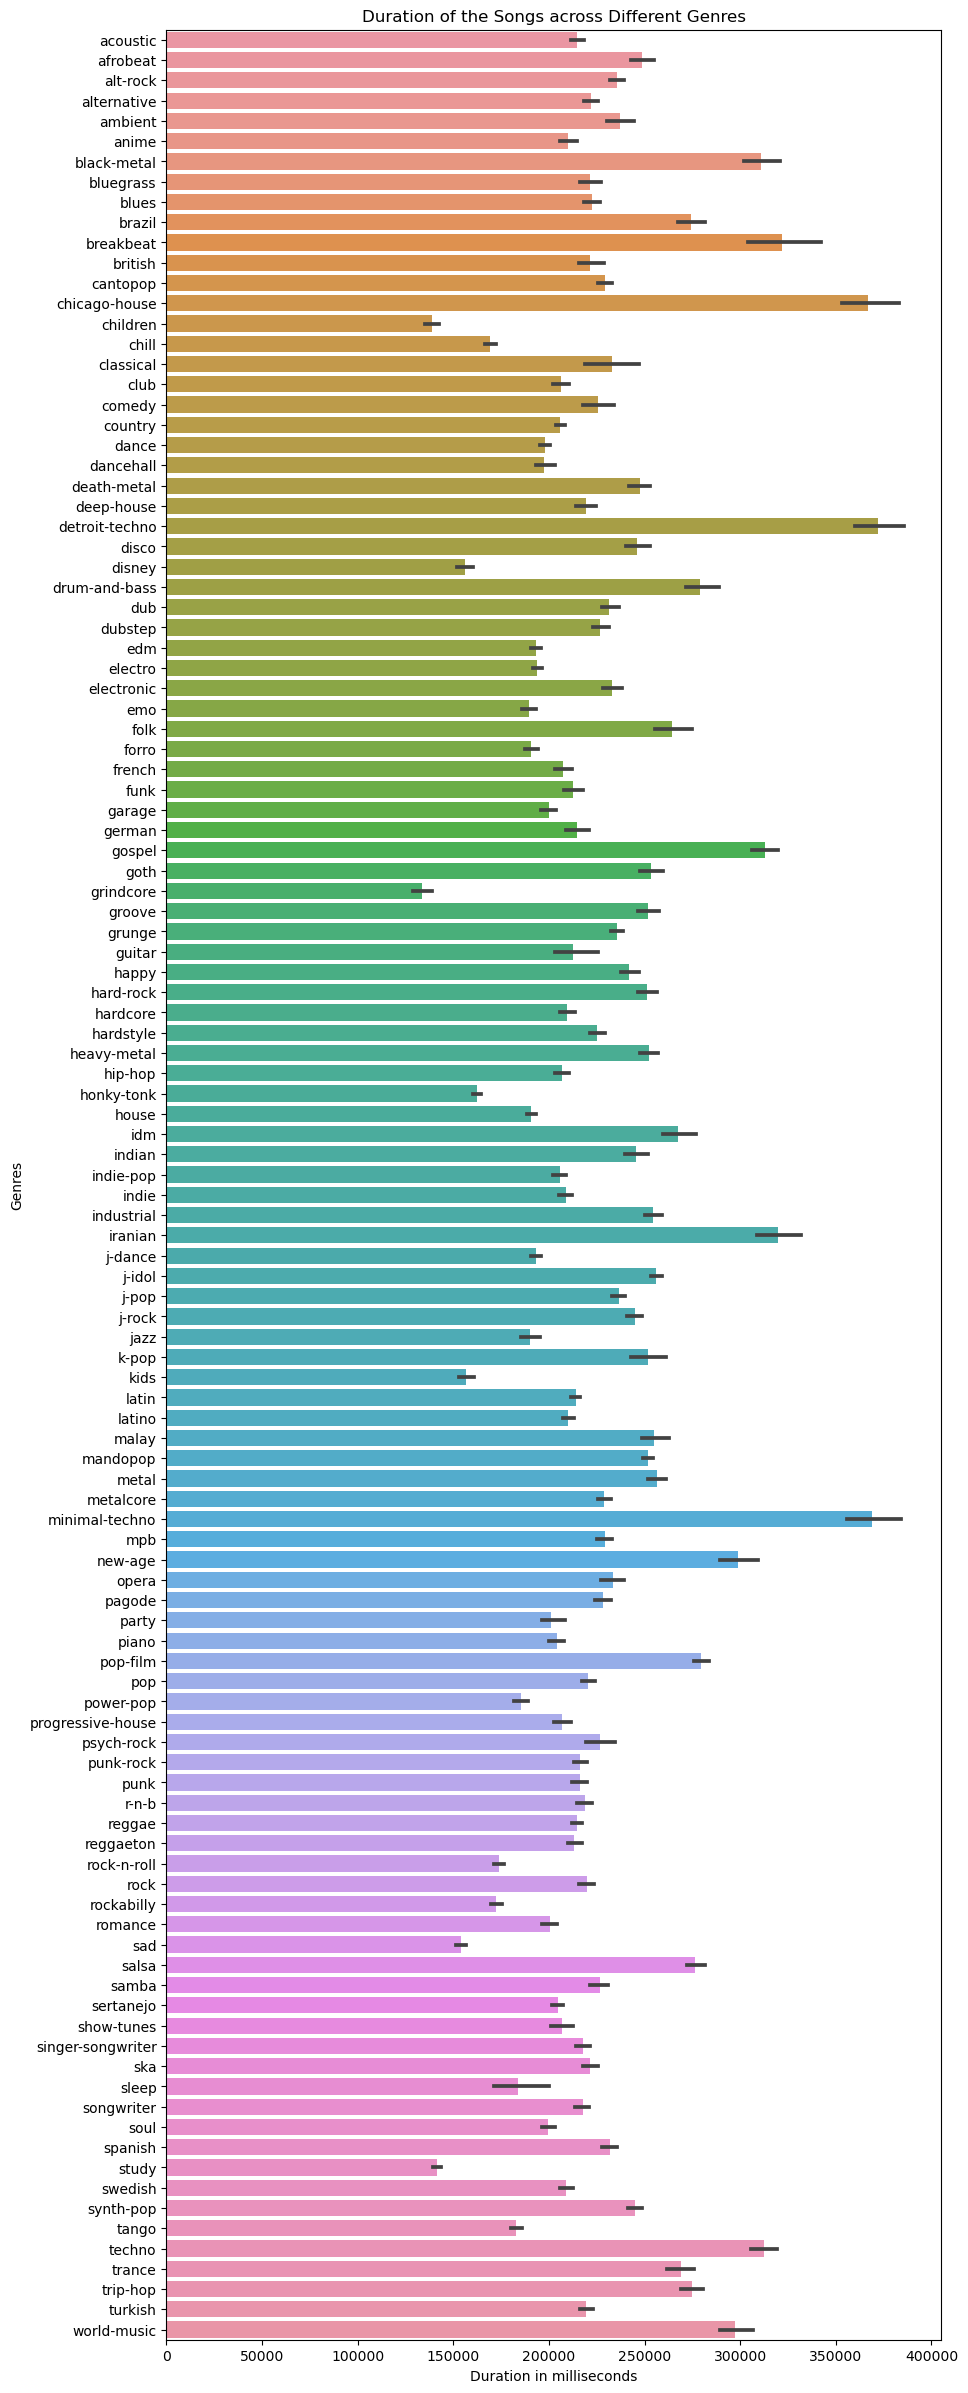

In [58]:
#duration of different songs across genre
plt.figure(figsize=(10,30))
plt.title("Duration of the Songs across Different Genres")
sns.color_palette("rocket", as_cmap = True)
sns.barplot (y='track_genre', x='duration_ms', data=df)
plt.xlabel("Duration in milliseconds")
plt.ylabel("Genres")